### Analyze and Visualize Textual Data

We will use the ```Natural Language Toolkit (NLTK)``` to tokenize the text data, and the ```Matplotlib library``` to visualize our results.

### Data source
Data used in this session is available on the Oxford Text Archive website.
link: https://ota.bodleian.ox.ac.uk/repository/xmlui/handle/20.500.12024/2021

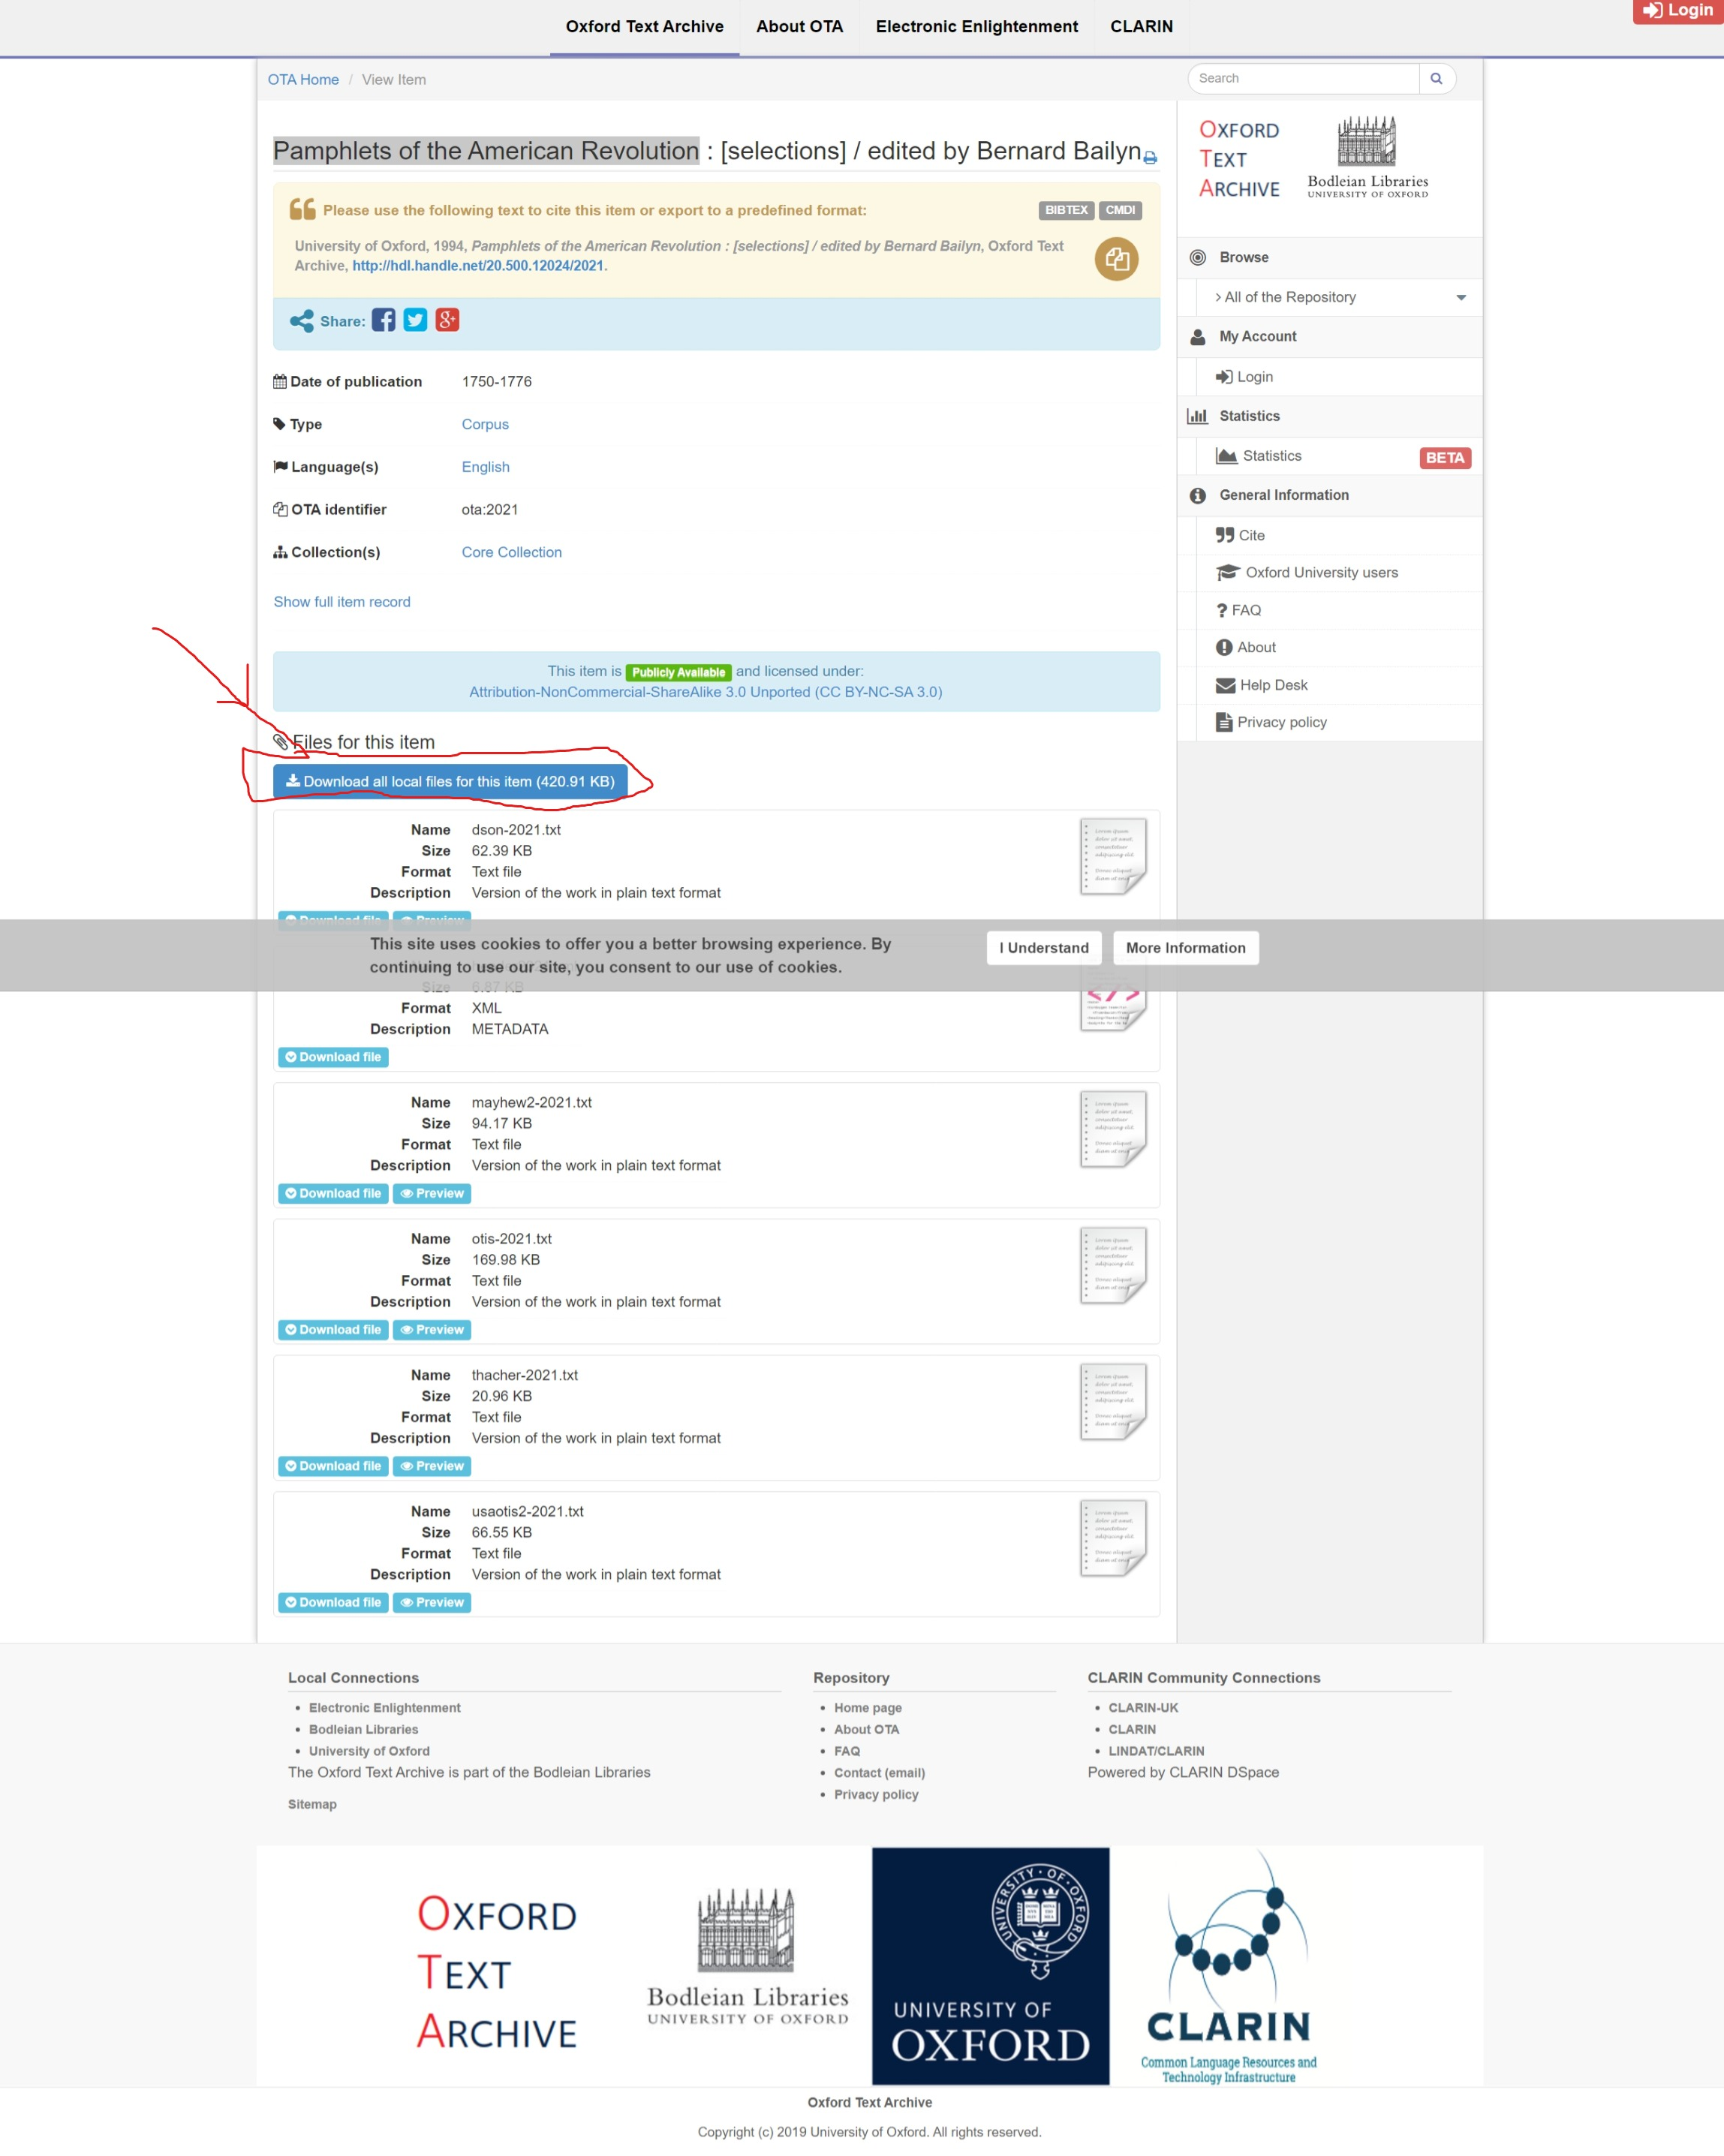


In your working repository, create a folder named 'datset'
extract the downloaded zip file to the datset folder.


after extraction it would look like the below figure :
(ensure the 3 .txt files are present. Rest are optional)

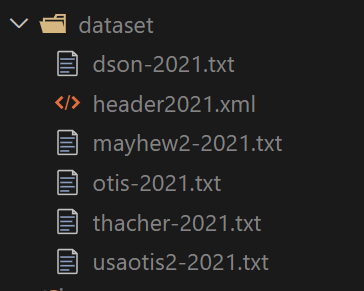

### Installing NLTK Library

Must have python installed and pip must be enabled

In [3]:
#check if python is installed
!python --version
!pip --version

Python 3.11.0
pip 24.0 from C:\Python311\Lib\site-packages\pip (python 3.11)



In [ ]:
# INSTALLING PIP
# only run this if pip version is not displayed in above cell
!curl https://bootst/rap.pypa.io/get-pip.py -o get-pip.py
!python get-pip.py

In [4]:
#Upgrading pip
!python -m pip install -U pip

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [7]:
#Installing NLTK Library

!pip install nltk

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
!pip install pandas
!pip install matplotlib

### 1. IMPORTING TEXT DATA with Python

In [1]:
from itertools import islice
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt

def load_text(filename):
    my_text = list()
    with open(filename, encoding= "latin-1") as f:
        for line in islice(f, 0, None):
            my_text.append(line)
    my_text = [word_tokenize(sentence) for sentence in my_text]
    flat_list = [item for sublist in my_text for item in sublist]
    return flat_list

# 'word_tokenize()' is a function from the NLTK library that splits a sentence into words. 
# All the sentences are then split into words and stored in a list. 
# Note that the list needs to be flattened into a single list, since the tokenizer returns a list of lists. 
# This is done with a list comprehension.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now we load the ```manifests``` of three authors: Oxenbridge Thacher, James Otis, and James Mayhew. 
The results are stored in three lists called thacher, otis, and mayhew

In [2]:
# import os
# os.getcwd()  #printing current working directory

thacher = load_text('dataset/thacher-2021.txt')
otis = load_text('dataset/otis-2021.txt')
mayhew = load_text('dataset/mayhew2-2021.txt')


In [3]:
#printing loaded samples 

print(thacher)
print(len(thacher))
# print(otis)
# print(len(otis))
# print(mayhew)
# print(len(mayhew))

['$', 'Oxenbridge', 'Thacher', '$', '$', 'The', 'Sentiments', 'of', 'a', 'British', 'American', '$', '$', 'Boston', ',', '1764', '$', '$', 'From', '``', 'Pamphlets', 'of', 'the', 'American', 'Revolution', "''", ',', 'Edited', 'by', 'Bernard', 'Bailyn', '$', '$', 'A.C.D.', '$', '$', 'Italics', 'in', 'curly', 'brackets', ',', 'footnotes', 'in', 'square', 'brackets', '$', '<', 'c', '1', '>', 'SENTIMENTS', 'of', 'a', 'British', 'American', 'IT', 'WELL', 'becomes', 'the', 'wisdom', 'of', 'a', 'great', 'nation', ',', 'having', 'been', 'highly', 'successful', 'in', 'their', 'foreign', 'wars', 'and', 'added', 'a', 'large', 'extent', 'of', 'country', 'to', 'their', 'dominions', ',', 'to', 'consider', 'with', 'a', 'critical', 'attention', 'their', 'internal', 'state', 'lest', 'their', 'prosperity', 'should', 'destroy', 'them', '.', 'Great', 'Britain', 'at', 'this', 'day', 'is', 'arrived', 'to', 'an', 'heighth', 'of', 'glory', 'and', 'wealth', 'which', 'no', 'European', 'nation', 'hath', 'ever', 

### 2. REMOVING STOP WORDS

we will use NLTK stopwords to remove all words that do not add any meaning to our analysis.

We will also transform all characters to lowercase and remove all words containing two or fewer characters.

In [4]:
def prepare_text(list_of_words):
  #load stopwords:
  stops = stopwords.words('english')
  #transform all word characters to lower case:
  list_of_words = [word.lower() for word in list_of_words]
  #remove all words containing up to two characters:
  list_of_words = [word for word in list_of_words if len(word)>2]
  #remove stopwords:
  list_of_words = [word for word in list_of_words if word not in stops]
  return list_of_words

We apply the function to the three lists of words. 

After cleaning ,we can observe that here, the number of words is reduced to less than 50% of the original size.

In [5]:
thacher_prepared = prepare_text(thacher)
otis_prepared = prepare_text(otis)
mayhew_prepared = prepare_text(mayhew)

In [6]:
#printing the number of words

print("Before cleaning")
print("thacher :" ,len(thacher))
print("otis :" ,len(otis))
print("mayhew :" ,len(mayhew))

print("\nAfter cleaning")
print("thacher :" ,len(thacher_prepared))
print("otis :" ,len(otis_prepared))
print("mayhew :" ,len(mayhew_prepared))

Before cleaning
thacher : 4156
otis : 34031
mayhew : 18969

After cleaning
thacher : 1714
otis : 13989
mayhew : 7463


### 3. Word count and frequency

The function below counts the ```frequency of each word``` and returns a ```Pandas dataframe``` with the words and their frequencies, sorted by the frequency.

In [7]:
def count_freq(my_list):
    unique_words = []
    counts = []
    # create a list of unique words:
    for item in my_list:
      if item not in unique_words: 
        unique_words.append(item)
    # count the frequency of each word:
    for word in unique_words:
      count = 0
      for i in my_list:
        if word == i:
          count += 1
      counts.append(count)
    # create a dataframe with the words and their frequencies:
    df = pd.DataFrame({"word": unique_words, "count": counts})
    df.sort_values(by="count", inplace = True, ascending = False)
    df.reset_index(drop=True, inplace = True)
    return df

thacher_df = count_freq(thacher_prepared)
otis_df = count_freq(otis_prepared)
mayhew_df = count_freq(mayhew_prepared)

### 4. Visualization

We will use the ```matplotlib library``` to create a ``bar plot`` with the 10 most frequent words in each manifest. 
We use ``iloc`` to select the ``first 10 rows`` of each dataframe. ``barh`` creates a ``horizontal bar plot`` where the words are on the y-axis and the frequency on the x-axis. After that, we set the title of each plot and perform a series of adjustments to the plot, including the elimination of the grid, the removal of part of the frame, and the change in font and background colors. Finally we also use the ``tight_layout()`` function to adjust the spacing between the plots.

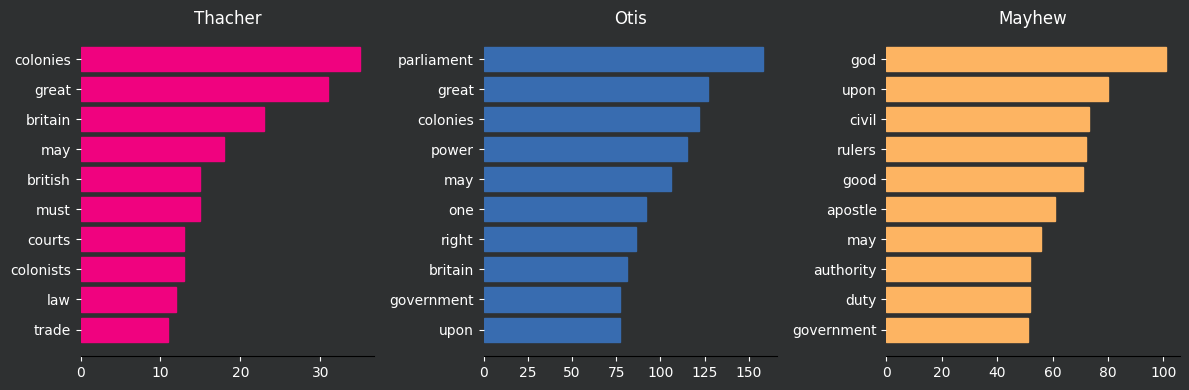

In [8]:
thacher_10 =thacher_df.iloc[:10]
otis_10 = otis_df.iloc[:10]
mayhew_10 = mayhew_df.iloc[:10]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))

# horizontal barplot:

ax1.barh(thacher_10["word"], thacher_10["count"], 
        color = "#f0027f", 
        edgecolor = "#f0027f")

ax2.barh(otis_10["word"], otis_10["count"], 
        color = "#386cb0", 
        edgecolor = "#386cb0")

ax3.barh(mayhew_10["word"], mayhew_10["count"], 
        color = "#fdb462", 
        edgecolor = "#fdb462")

# title:
ax1.set_title("Thacher")
ax2.set_title("Otis")
ax3.set_title("Mayhew")

# iterate over ax1, ax2, ax3 to: 
# invert the y axis;
# eliminate grid;
# set fonts and background colors;
# eliminate spines;
for ax in fig.axes:                             
    ax.invert_yaxis()                           
    ax.grid(False)                              
    ax.title.set_color('white')                 
    ax.tick_params(axis='x', colors='white')    
    ax.tick_params(axis='y', colors='white')    
    ax.set_facecolor('#2E3031')                 
    ax.spines["top"].set_visible(False)         
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

# fig background color:
fig.patch.set_facecolor('#2E3031')
# layout:
fig.tight_layout()

plt.show()

### 5. Calculating Proportion of each words & Comparing Manifests | ScatterPlot

we calculate the proportion of each word in each manifest relative to the total number of words in that document and store them in a new column called “proportion”. 

We also create two new data frames, one for each pair of manifests: one to compare Thacher and Otis, and the other to compare Thacher and Mayhew. This is done by an outer join, using the word column as the key. This operation keeps all the words, even the ones that are not included in both datasets, and fills the missing values with 0.

In [9]:
thacher_df["proportion"] = thacher_df["count"]/sum(thacher_df["count"])
otis_df["proportion"] = otis_df["count"]/sum(otis_df["count"])
mayhew_df["proportion"] = mayhew_df["count"]/sum(mayhew_df["count"])

thacher_otis = thacher_df[["word", "proportion"]].merge(
    otis_df[["word", "proportion"]], 
    on = "word", 
    how = "outer", 
    suffixes = ("_thacher", "_otis")).fillna(0)

thacher_mayhew = thacher_df[["word", "proportion"]].merge(
    mayhew_df[["word", "proportion"]],
    on = "word",
    how = "outer",
    suffixes = ("_thacher", "_mayhew")).fillna(0)

Now, we will compare the three manifests by plotting the proportion of each word in Thacher on the x-axis and the proportion of the same word in Otis on the y-axis. 

We will use the `scatter` function to create a scatter plot in which the coordinates are the frequencies of a given word in Thacher and Otis. 
We use the `annotate` function to label each point with the word. 

The same procedure will be used to compare Thacher and Mayhew. Note that the more similar the manifests, the more points will be concentrated in the diagonal line (same frequency in both manifests).

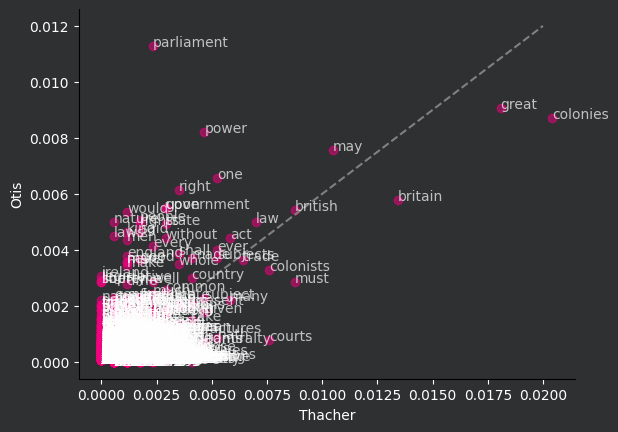

In [10]:
#COMPARING THACHER & OTIS
fig, ax = plt.subplots()

# scatterplot:
ax.scatter(thacher_otis["proportion_thacher"], thacher_otis["proportion_otis"], color = "#f0027f", alpha = 0.5)

# annotate words:
for i, txt in enumerate(thacher_otis["word"]):
    ax.annotate(txt, 
                (thacher_otis["proportion_thacher"][i], 
                 thacher_otis["proportion_otis"][i]), 
                 color = "white", 
                 alpha = 0.7)
    
# eliminate grid:
ax.grid(False)

# x axis label:
ax.set_xlabel("Thacher")

# y axis label:
ax.set_ylabel("Otis")

# diagonal dashed line:
ax.plot([0, 0.02], [0, 0.012], color = "gray", linestyle = "--")

# fig background color:
fig.patch.set_facecolor('#2E3031')

# ax background color:
ax.set_facecolor('#2E3031')

# x and y axes labels font color to white:
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')


# ax font colors set to white:
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# set spines to false:
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

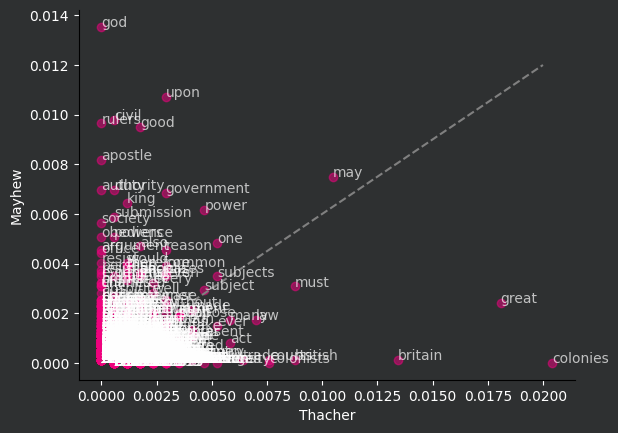

In [11]:
#COMPARING THACHER AND MAYHEW
# plot scatterplot with words:
fig, ax = plt.subplots()

ax.scatter(thacher_mayhew["proportion_thacher"], 
           thacher_mayhew["proportion_mayhew"], 
           color = "#f0027f", 
           alpha = 0.5)

for i, txt in enumerate(thacher_mayhew["word"]):
    ax.annotate(txt, (thacher_mayhew["proportion_thacher"][i], 
                      thacher_mayhew["proportion_mayhew"][i]), 
                      color = "white", 
                      alpha = 0.7)
# eliminate grid:
ax.grid(False)
# x axis label:
ax.set_xlabel("Thacher")
# y axis label:
ax.set_ylabel("Mayhew")
# diagonal dashed line:
ax.plot([0, 0.02], [0, 0.012], 
        color = "gray", 
        linestyle = "--")

# fig background color:
fig.patch.set_facecolor('#2E3031')

# ax background color:
ax.set_facecolor('#2E3031')

# x and y axes labels font color to white:
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')


# ax font colors set to white:
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# set spines to false:
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

It can be observed that: 'Thacher and Otis' are more similar than 'Thacher and Mayhew'. 

This is reflected in the scatterplot, where the `points are more concentrated in the diagonal line` in the plot relating Thacher and Otis compared to the one relating Thacher and Mayhew. 

This is a simple way to compare the similarity of two texts.
From the plots; we can state ,for example, that, while Thacher talks a lot about “colonies”, Mayhew talks a lot about “god”.

In [13]:
!pip install wordcloud

     ---------------------------------------- 0.0/98.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/98.3 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/98.3 kB ? eta -:--:--
     ----------- -------------------------- 30.7/98.3 kB 217.9 kB/s eta 0:00:01
     --------------- ---------------------- 41.0/98.3 kB 245.8 kB/s eta 0:00:01
     --------------- ---------------------- 41.0/98.3 kB 245.8 kB/s eta 0:00:01
     --------------- ---------------------- 41.0/98.3 kB 245.8 kB/s eta 0:00:01
     --------------- ---------------------- 41.0/98.3 kB 245.8 kB/s eta 0:00:01
     --------------- ---------------------- 41.0/98.3 kB 245.8 kB/s eta 0:00:01
     ----------------------- -------------- 61.4/98.3 kB 164.1 kB/s eta 0:00:01
     ----------------------- -------------- 61.4/98.3 kB 164.1 kB/s eta 0:00:01
     ----------------------- -------------- 61.4/98.3 kB 164.1 kB/s eta

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python311\\Scripts\\wordcloud_cli.exe' -> 'C:\\Python311\\Scripts\\wordcloud_cli.exe.deleteme'



### 6. Visualising as a word cloud

In [12]:
data = thacher_df.set_index('word').to_dict()['count']

# print(data)

from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)


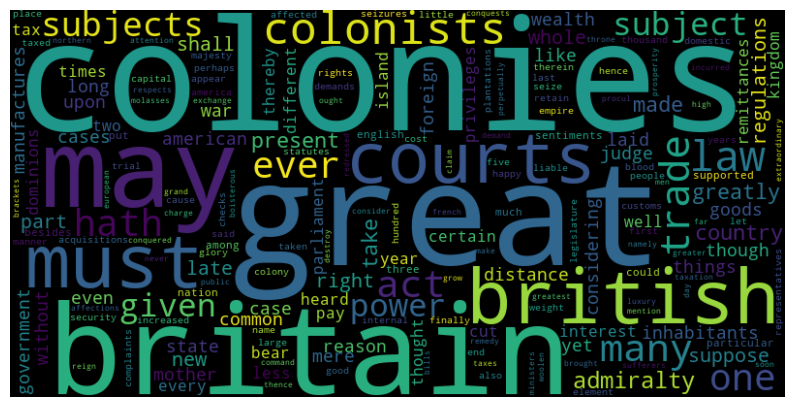

In [13]:
#using matplot lib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
# saving the word cloud picture

wc.to_file("wordcloud.png")